### 1.	Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of linear threshold units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?


A classical perceptron will only converge if the data is linearly seperable. It also cannot compute class probabilities. The logistic regression classifier is able to converge on non-linear data and outputs class probabilities.

If you want to tweak the Perceptron to make it like a logistic regression classifier you can do so by changing the activation function to the softmax or the sigmoid function and train it using gradient descent, or some other optimization algorithm.

### 2.	Why was the logistic activation function a key ingredient in training the first MLPs?


The logistic activation function is smooth at all points. Therefore, its derivative is always non-zero. This allows gradient descent to find smaller values of theta after each iteration. When the activation function is a step function, gradient descent cannot move at all because there is no slope.

### 3.	Name three popular activation functions. Can you draw them?


Sigmoid
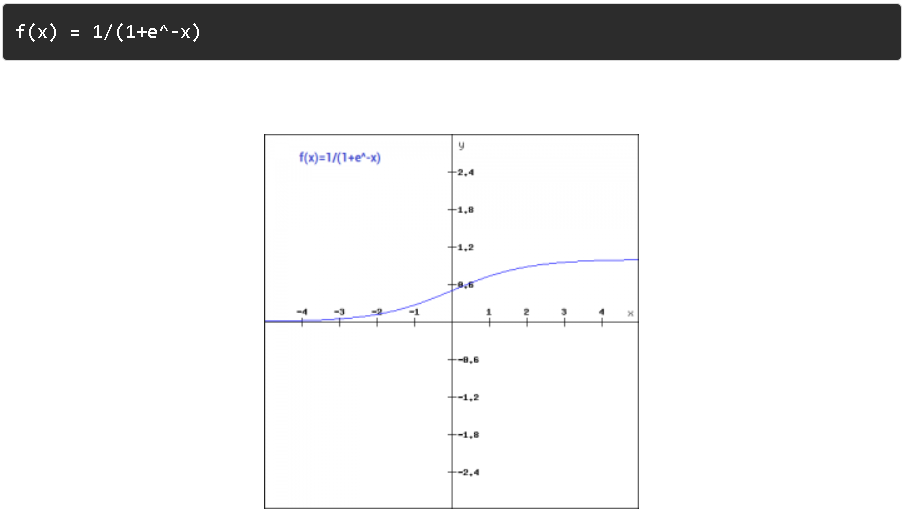

Tanh 
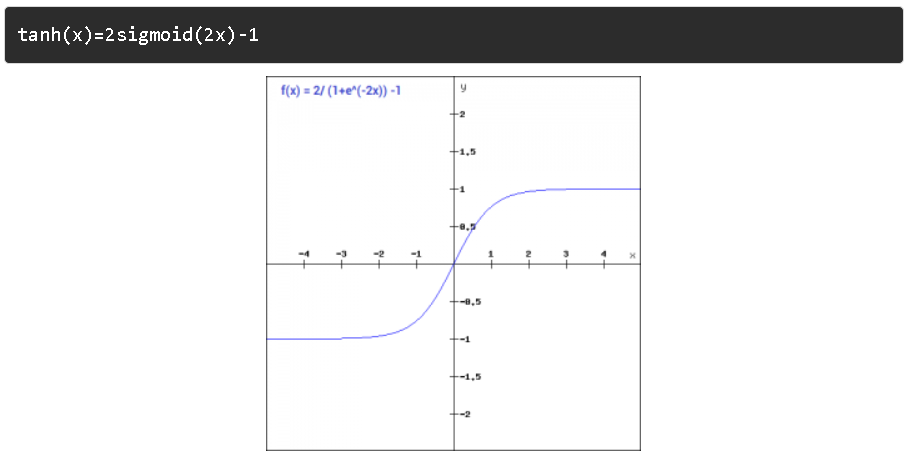

Relu
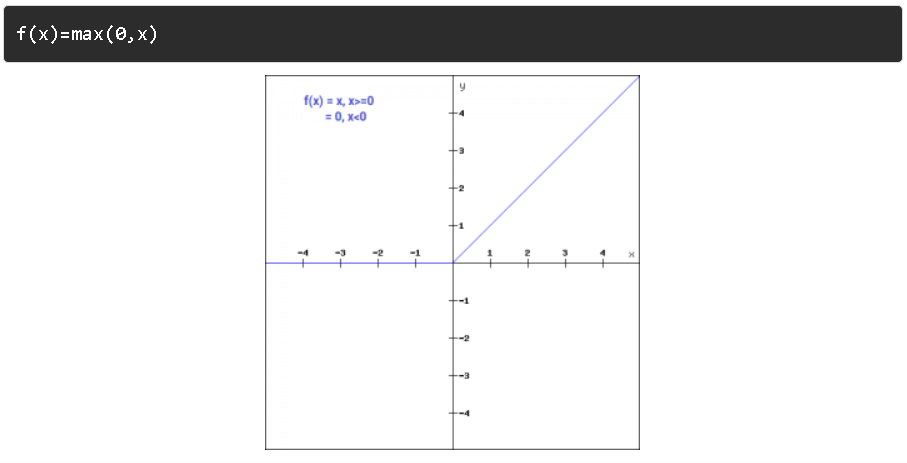



### 4.	Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

•	What is the shape of the input matrix X?

The shape of X will be (m x 10) where m is the batch size. The logic of a passthrough neuron is that it should have no effect at all on the input layer. Therefore, there must be one neuron for each input feature that allows the input feature to pass through to the next layer without altering its value in any way.

•	What about the shape of the hidden layer’s weight vector Wh, and the shape of its bias vector bh?

Since the hidden layer has 50 neurons and there are 10 features, its weight vector will have the shape of 10 x 50. Because each of the 10 features will need to be multiplied by a weight which is connected to each of the 50 hidden layer neurons.

The bias vector will have a length of 50. This is because one bias unit is added to the output of the passthrough layer. That unit is then multiplied once for each of the 50 artificial neurons.

•	What is the shape of the output layer’s weight vector Wo, and its bias vector bo?

The output layer has 3 neurons. The input to the output layer is the output of the hidden layer.The output of the hidden layer has 50 neurons, therefore the shape of the output layer's weight vector is 50 x 3.

The bias vector will have a length of 3 because one bias unit is added to the output of the hidden layer. That unit is then multiplied once for each of the 3 neurons in the output layer.

•	What is the shape of the network’s output matrix Y?

The shape of the output matrix is going to be m x 3, where m is the batch size, and 3 because each example will compute a probability that it belongs to one of three classes.

•	Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo and bo.

Y = (X * Wh + bh) * (Wo + bo)

When adding a bias vector to a matrix it is added to every single row. This is called broadcasting.

### 5.	How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function?


Email classification is a binary classification problem, so you would only need one neuron in the output layer. This neuron would indicate the probability that the email is spam or ham. You'd most likely use the sigmoid activation function in the output layer.

For the MNIST problem you would need 10 output neurons in the final layer, one for each digit. You would then replace the logistic function with the softmax function which can output one probability per class per digit.

Predicting housing prices is a linear regression problem. You'd only need one output neuron in the final layer. You wouldn't need to use an activation function at all.

### 6.	What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?


Backpropagation is an algorithm used to train neural networks. It first computes the gradients of the cost function with regards to every model parameter then it performs a gradient descent step using these gradients.

This backpropagation step is performed until the model parameters converge to values that hopefully minimize the cost function.

Backpropagation refers to the whole process of training a neural network. Reverse-mode autodiff is a technique to compute the gradients efficiently. It is used by the backprop algorithm.

### 7.	Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?



In general, the hyperparameters of a neural network you can adjust are the number of hidden layers, the number of neurons in each hidden layer, and the activation function used by each neuron.

For binary classification, use the logistic activation function. For a multi-class problem, use softmax. For a linear regression problem, don't use an activation function.

Some simple ways to try and solve overfitting are reducing the number of hidden layers or the number of neurons.

### 8.	Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on).


In [ ]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [ ]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [ ]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs + n_neurons)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [ ]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [ ]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [ ]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [ ]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

In [ ]:
n_epochs = 40
batch_size = 50

In [ ]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                           y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")